In [1]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all rows
#pd.set_option('display.max_rows', 20)

In [2]:
df = pd.read_parquet('df_res.parquet')
df.head()

,subject,date_of_visit,wt,sbp,dbp,bmi,a1c,trig,hdl,total_chol,ldl,visit,db_bin,db_multi,blood_pressure,body_type,blood_pressure_c,body_type_c,db_multi_c,db_bin_c
0,1.0,2023-03-27,264.0,129.0,78.0,39.07,6.4,187.0,54.0,113.0,22.1,initial,Non-Diabetes,Pre-Diabetes,Elevated,Obesity,1.0,3,1,0
1,1.0,2024-05-16,233.0,104.0,79.0,34.50,5.8,121.0,52.0,150.0,74.0,follow_up,Non-Diabetes,Pre-Diabetes,Normal,Obesity,0.0,3,1,0
2,2.0,2023-03-28,233.0,130.0,89.0,31.67,6.7,63.0,49.0,146.0,84.6,initial,Diabetes,Diabetes,Hypertension Stage 1,Obesity,2.0,3,2,1
3,2.0,2023-12-22,220.0,138.0,71.0,29.90,5.6,NaN,NaN,NaN,NaN,follow_up,Non-Diabetes,Healthy,Hypertension Stage 1,Overweight,2.0,2,0,0
4,4.0,2023-03-29,197.0,129.0,80.0,30.02,6.5,438.0,23.0,116.0,53.0,initial,Diabetes,Diabetes,Hypertension Stage 1,Obesity,2.0,3,2,1


In [3]:
df1 = df.iloc[:, :15]


In [4]:
# Capitalize all column names
df1.columns = df1.columns.str.upper()

# Rename columns 'DB_BIN' to 'CLASS' and 'DB_MULTI' to 'STATUS'
df1 = df1.rename(columns={'DB_BIN': 'CLASS', 'DB_MULTI': 'STATUS'})

# Display the updated DataFrame
df1.head()

,SUBJECT,DATE_OF_VISIT,WT,SBP,DBP,BMI,A1C,TRIG,HDL,TOTAL_CHOL,LDL,VISIT,CLASS,STATUS,BLOOD_PRESSURE
0,1.0,2023-03-27,264.0,129.0,78.0,39.07,6.4,187.0,54.0,113.0,22.1,initial,Non-Diabetes,Pre-Diabetes,Elevated
1,1.0,2024-05-16,233.0,104.0,79.0,34.50,5.8,121.0,52.0,150.0,74.0,follow_up,Non-Diabetes,Pre-Diabetes,Normal
2,2.0,2023-03-28,233.0,130.0,89.0,31.67,6.7,63.0,49.0,146.0,84.6,initial,Diabetes,Diabetes,Hypertension Stage 1
3,2.0,2023-12-22,220.0,138.0,71.0,29.90,5.6,NaN,NaN,NaN,NaN,follow_up,Non-Diabetes,Healthy,Hypertension Stage 1
4,4.0,2023-03-29,197.0,129.0,80.0,30.02,6.5,438.0,23.0,116.0,53.0,initial,Diabetes,Diabetes,Hypertension Stage 1


In [5]:
df1.to_csv('df1.csv', index=False)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SUBJECT         372 non-null    float64       
 1   DATE_OF_VISIT   372 non-null    datetime64[ns]
 2   WT              372 non-null    float64       
 3   SBP             371 non-null    float64       
 4   DBP             371 non-null    float64       
 5   BMI             364 non-null    float64       
 6   A1C             368 non-null    float64       
 7   TRIG            263 non-null    float64       
 8   HDL             263 non-null    float64       
 9   TOTAL_CHOL      263 non-null    float64       
 10  LDL             237 non-null    float64       
 11  VISIT           372 non-null    object        
 12  CLASS           372 non-null    category      
 13  STATUS          372 non-null    category      
 14  BLOOD_PRESSURE  371 non-null    category      
dtypes: cat

In [13]:
df1['SUBJECT'].nunique()


186

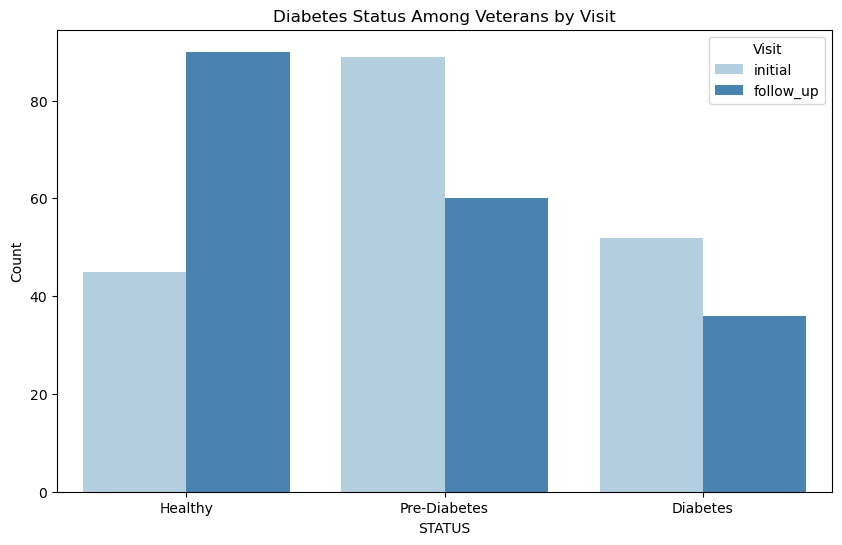

In [7]:
# 2. Count plot for diabetes status with hue of visit
plt.figure(figsize=(10, 6))
sns.countplot(x='STATUS', hue='VISIT', data=df1, palette='Blues')
plt.title('Diabetes Status Among Veterans by Visit')
plt.ylabel('Count')
plt.legend(title='Visit')
plt.show()



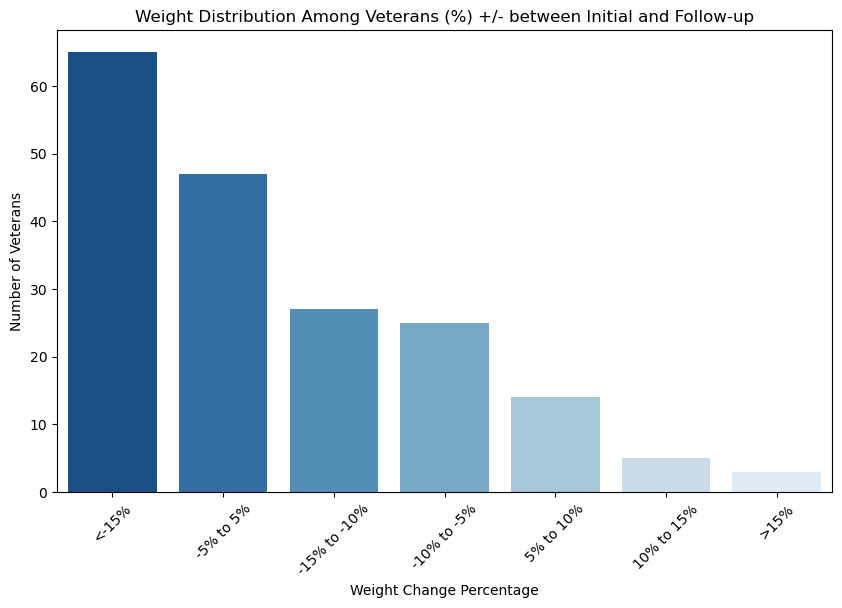

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate weight change for each veteran between the initial and follow-up visits
# Create a pivot table to have initial and follow-up weights side by side for each subject
df1['VISIT'] = df1['VISIT'].str.lower()
weight_change_df = df1.pivot(index='SUBJECT', columns='VISIT', values='WT')

# Calculate the weight change
weight_change_df['weight_change'] = weight_change_df['follow_up'] - weight_change_df['initial']

# Categorize the weight change
weight_change_df['weight_category'] = pd.cut(weight_change_df['weight_change'], 
                                             bins=[-float('inf'), -15, -10, -5, 5, 10, 15, float('inf')],
                                             labels=['<-15%', '-15% to -10%', '-10% to -5%', '-5% to 5%', '5% to 10%', '10% to 15%', '>15%'])

# Create a custom color palette with enough shades to represent the gradient
palette = sns.color_palette("Blues", n_colors=7)[::-1]

# Plot the weight change distribution with the custom palette
plt.figure(figsize=(10, 6))
sns.countplot(x='weight_category', data=weight_change_df, order=weight_change_df['weight_category'].value_counts().index, palette=palette)
plt.title('Weight Distribution Among Veterans (%) +/- between Initial and Follow-up')
plt.xlabel('Weight Change Percentage')
plt.ylabel('Number of Veterans')
plt.xticks(rotation=45)
plt.show()





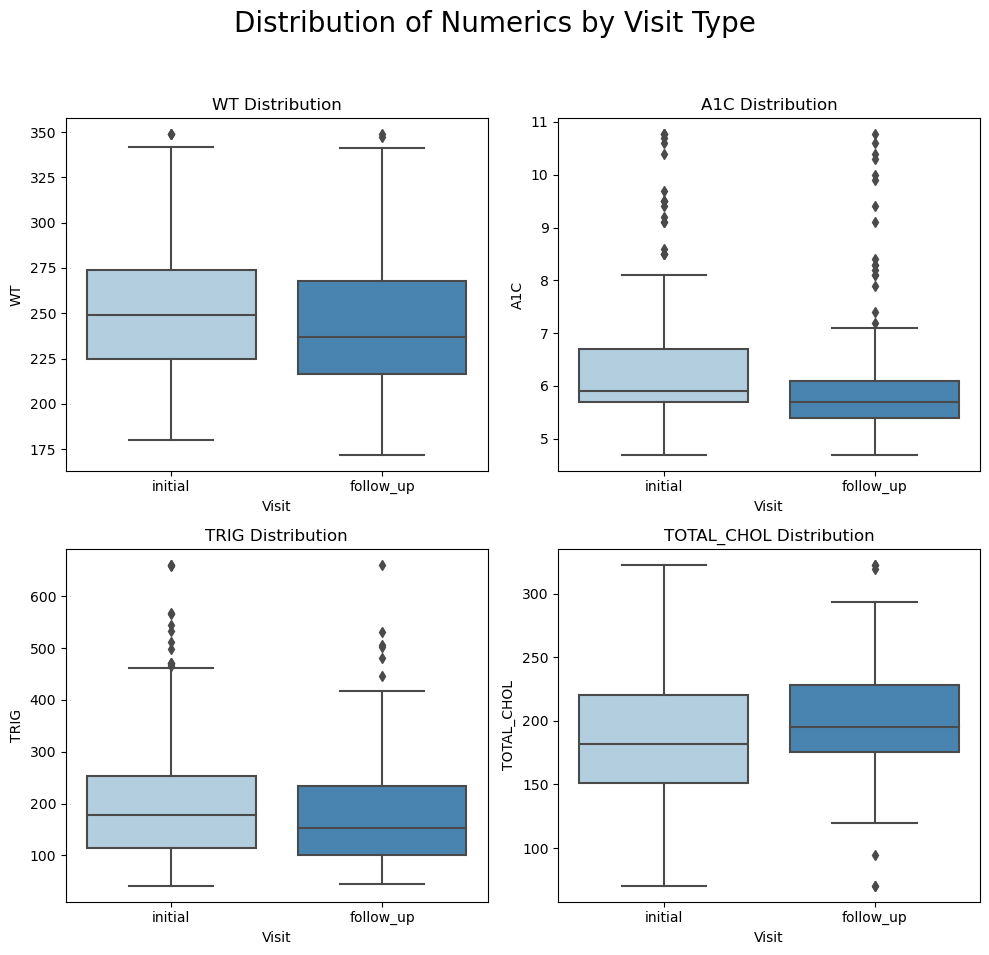

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the selected numeric columns
numeric_cols = ['WT', 'A1C', 'TRIG', 'TOTAL_CHOL']

# Filter data to include only rows where TRIG and TOTAL_CHOL have both initial and follow_up data
filtered_df = df1.groupby('SUBJECT').filter(lambda x: len(x[x['VISIT'].isin(['initial', 'follow_up'])]) == 2)

# Clip the data to remove extreme outliers (e.g., using the 1st and 99th percentiles)
for col in numeric_cols:
    lower_bound = filtered_df[col].quantile(0.01)
    upper_bound = filtered_df[col].quantile(0.99)
    filtered_df[col] = filtered_df[col].clip(lower=lower_bound, upper=upper_bound)

# Define subplot grid dimensions
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
fig.suptitle('Distribution of Numerics by Visit Type', fontsize=20)

# Flatten axes array for easy iterating
axes = axes.flatten()

# Plot Box plots for each metric
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=filtered_df, x="VISIT", y=col, ax=axes[i], palette="Blues")
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('Visit')
    axes[i].set_ylabel(col)

# Hide any unused axes if the number of numeric columns isn't a perfect multiple of n_cols
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


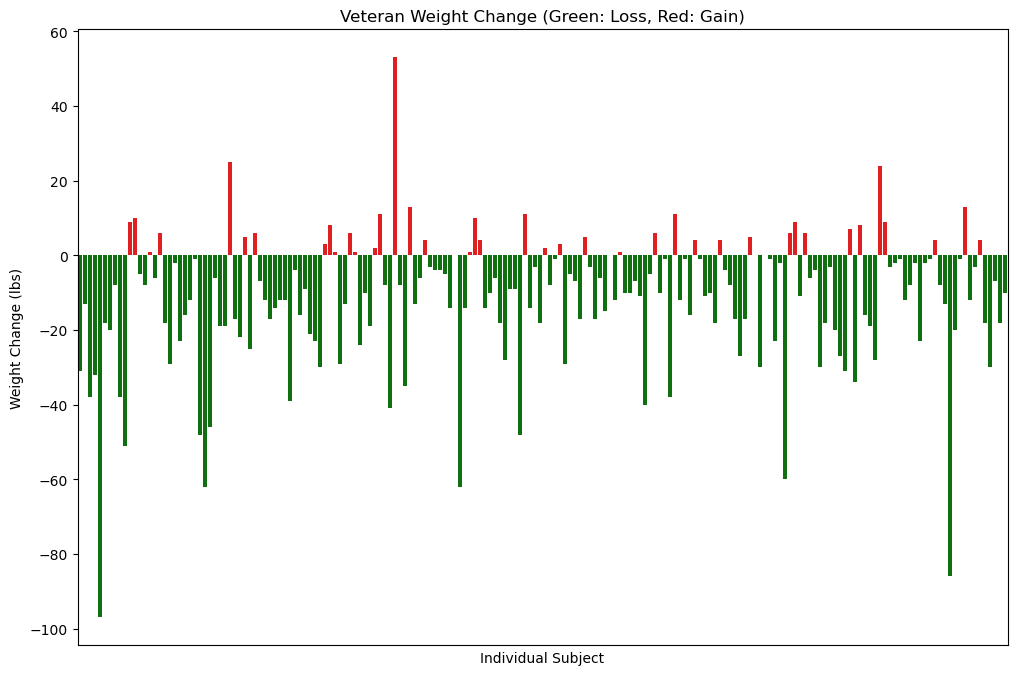

In [10]:


# Ensure the VISIT column is lowercase for consistency
df1['VISIT'] = df1['VISIT'].str.lower()

# Create a pivot table to have initial and follow-up weights side by side for each subject
weight_change_df = df1.pivot(index='SUBJECT', columns='VISIT', values='WT')

# Calculate the weight change
weight_change_df['weight_change'] = weight_change_df['follow_up'] - weight_change_df['initial']

# Sort the weight_change_df by SUBJECT for consistent plotting
weight_change_df_sorted = weight_change_df.sort_values(by='SUBJECT')

# Create a color palette based on the weight change
colors = ['green' if x < 0 else 'red' for x in weight_change_df_sorted['weight_change']]

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=weight_change_df_sorted.index, y=weight_change_df_sorted['weight_change'], palette=colors)

# Add labels and titles
plt.xlabel('Individual Subject')  # X-axis title
plt.ylabel('Weight Change (lbs)')
plt.xticks([], [])  # Remove x-ticks and labels as per the request
plt.title('Veteran Weight Change (Green: Loss, Red: Gain)')
plt.show()




In [11]:
# Calculate summary statistics for each metric, focusing on the median only
summary_stats_median = {}

for metric in metrics:
    initial_values = df1[df1['VISIT'] == 'initial'][metric]
    follow_up_values = df1[df1['VISIT'] == 'follow_up'][metric]
    
    summary_stats_median[metric] = {
        'Initial Median': initial_values.median(),
        'Follow-up Median': follow_up_values.median(),
        'Difference': follow_up_values.median() - initial_values.median(),
    }

# Convert summary statistics to a DataFrame for better readability
summary_stats_median_df = pd.DataFrame(summary_stats_median)

# Display the summary statistics
summary_stats_median_df.transpose()


NameError: name 'metrics' is not defined